## System ODEs for the simple pendulum model
The following equations will be used to create a simplified model of a pendulum system.
\begin{align}
m\ddot{x} &= mg - kx - c\dot{x}\\
\ddot{x}_{ss} &= \frac{mg}{k}\\
\end{align}

In [37]:
from sympy import Symbol, Function, dsolve, lambdify, simplify, Eq, classify_ode, pi
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt

In [38]:
# system parameter variables
m = Symbol('m')
H = Symbol('H')
c = Symbol('c')
k = Symbol('k')
g = Symbol('g')

#independent variable
t = Symbol('t')

In [39]:
# general differential functions
x = sym.Function('x')(t)
xdot = x.diff(t)
xddot = xdot.diff(t)

### General ODE using SymPy

In [40]:
# general ODE
expr = Eq(m*xddot, m*g - k*x - c*xdot)
display(expr)

Eq(m*Derivative(x(t), (t, 2)), -c*Derivative(x(t), t) + g*m - k*x(t))

### Setting parameter values

In [41]:
# substitute parameter values
m = 60
H = 40
c = 17
k = 37
g = 9.81

In [42]:
# create and displaya table of parameter values
df = pd.DataFrame({"parameter": ['m', 'H', 'c','k', 'g'], 'value': [m, H, c, k, g]})
display(df)

,parameter,value
0,m,60.00
1,H,40.00
2,c,17.00
3,k,37.00
4,g,9.81


### Specific ODE with chosen parameter values

In [43]:
# specific ODE with parameter values
expr = Eq(m*xddot, m*g - k*x - c*xdot)
display(expr)

Eq(60*Derivative(x(t), (t, 2)), -37*x(t) - 17*Derivative(x(t), t) + 588.6)

### Check ODE solver classifications

In [44]:
# check possible ODE solving methods
classify_ode(expr)

('factorable',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

### General solution

In [45]:
# try general solution using default (first) solving method
result = dsolve(expr, x, hint="default")
result.rhs

(C1*sin(0.772397062541166*t) + C2*cos(0.772397062541166*t))*exp(-0.141666666666667*t) + 15.9081081081081

### Specific solution using initial conditions

In [46]:
# get specific solution using initial conditions
x_0 = 0
xdot_0 = 0
print(f"initial conditions: x_0 = {x_0}, xdot_0 = {xdot_0}")
result = dsolve(expr, x, hint="factorable", ics={x.subs(t,0): x_0, xdot.subs(t, 0): xdot_0})
result.rhs

initial conditions: x_0 = 0, xdot_0 = 0


(-2.91773332388681*sin(0.772397062541166*t) - 15.9081081081081*cos(0.772397062541166*t))*exp(-0.141666666666667*t) + 15.9081081081081

### Create data points and plot

In [47]:
# create a lambda function in order to compute data points
x = lambdify(t, result.rhs, 'numpy')

In [51]:
# calculate steady-state
x_ss = H - x_ss

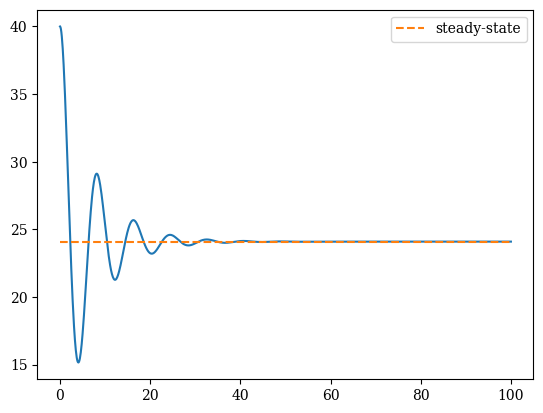

In [52]:
# create data points and basic plot
t = np.linspace(0, 100, 1000)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.plot(t, H - x(t))
plt.plot([0, np.max(t)], [x_ss, x_ss], "--", label="steady-state")
plt.legend()
plt.savefig("pendulum.png")
plt.show()

In [36]:
dd = pd.DataFrame({'x': t, 'y': H - x(t)})
display(dd)

,x,y
0,0.0000,40.000000
1,0.1001,39.951338
2,0.2002,39.807468
3,0.3003,39.571927
4,0.4004,39.248713
...,...,...
995,99.5996,24.091895
996,99.6997,24.091894
997,99.7998,24.091893
998,99.8999,24.091892


In [339]:
filename = "data.csv"
dd.to_csv(filename, index=False)

In [53]:
import numpy as np
import pandas as pd


In [65]:
# 零交叉点函数
def find_zero_crossings(data, time):
    zero_crossings = []
    # 检查数据的符号变化
    sign_changes = np.sign(data[:-1]) != np.sign(data[1:])
    for i in np.where(sign_changes)[0]:
        # 线性插值来估算零交叉点的时间
        zero_crossings.append((time[i+1] + time[i]) / 2)  # 或者进行更精确的计算
    return zero_crossings

# 转折点函数
def find_turning_points(data, time):
    turning_points = []
    # 一阶差分来找到数据的增减变化
    data_diff = np.diff(data)
    # 二阶差分来确定极值点
    extremes = np.diff(np.sign(data_diff))
    for i in np.where(extremes != 0)[0] + 1:
        turning_points.append(time[i])
    return turning_points


In [66]:
import os

# 打印当前工作目录
print("当前工作目录:", os.getcwd())

# 列出当前工作目录中的文件
print("工作目录中的文件:", os.listdir('.'))


当前工作目录: /home/bpwg55/.local/share/Trash/files/group-main.4/week10
工作目录中的文件: ['data.csv', 'Untitled.ipynb', '.ipynb_checkpoints', 'pendulum.png']


In [67]:
import pandas as pd

# 使用正确的文件路径
data_df = pd.read_csv('/home/bpwg55/.local/share/Trash/files/group-main.4/week10/data.csv')

# 打印DataFrame的前几行，以确认数据已正确加载
print(data_df.head())


        x          y
0  0.0000  40.000000
1  0.1001  39.951338
2  0.2002  39.807468
3  0.3003  39.571927
4  0.4004  39.248713


In [68]:
# 确保这些是数值
m = 60 # 系统质量
g = 9.81 # 重力加速度
k = 37 # 弹簧刚度
H = 40 # 起始高度或参考点的高度

# 基于这些数值计算 x_ss
x_ss = (m * g) / k  # 计算出稳态位移

# 现在计算相对于 H 的位移
relative_x_ss = H - x_ss

# 继续你的数据处理...


In [69]:
# 替换以下路径和列名为你的实际文件路径和列名
data_df = pd.read_csv('/home/bpwg55/.local/share/Trash/files/group-main.4/week10/data.csv')
x_t = data_df.iloc[:, 0]  # 假设 x(t) 在第一列
time = data_df.iloc[:, 1]  # 假设时间在第二列

# 假设以下是已知的稳态值 x_ss
x_ss = H - x_ss # 将 ... 替换为实际的稳态值
data_df['x_minus_xss'] = x_t - x_ss


In [73]:
print(data_df.columns)


Index(['x', 'y', 'x_minus_xss'], dtype='object')


In [72]:
# 确认数据列是否包含有效数据
print(data_df['x_minus_xss'].head())
print(time.head())

# 手动检查前几个数据点，看看是否应该有零交叉点和转折点
print(data_df['x_minus_xss'][:10])
print(np.diff(data_df['x_minus_xss'][:10]))


0   -24.091892
1   -23.991792
2   -23.891692
3   -23.791592
4   -23.691491
Name: x_minus_xss, dtype: float64
0    40.000000
1    39.951338
2    39.807468
3    39.571927
4    39.248713
Name: y, dtype: float64
0   -24.091892
1   -23.991792
2   -23.891692
3   -23.791592
4   -23.691491
5   -23.591391
6   -23.491291
7   -23.391191
8   -23.291091
9   -23.190991
Name: x_minus_xss, dtype: float64
[0.1001001 0.1001001 0.1001001 0.1001001 0.1001001 0.1001001 0.1001001
 0.1001001 0.1001001]


In [80]:
import pandas as pd
import numpy as np

# 定义物理常数和条件
m = 60  # 质量 (kg)
g = 9.81  # 重力加速度 (m/s^2)
k = 37  # 弹簧刚度 (N/m)
H = 40  # 起始高度 (m)

# 计算稳态位移 x_ss
x_ss = (m * g) / k

# 读取数据
data_df = pd.read_csv('/home/bpwg55/.local/share/Trash/files/group-main.4/week10/data.csv')

# 创建 x_minus_xss 列
data_df['x_minus_xss'] = data_df['x'] - x_ss

# 将 Pandas Series 转换为 numpy 数组
x_values = data_df['x'].to_numpy()
y_values = data_df['y'].to_numpy()
x_minus_xss_values = data_df['x_minus_xss'].to_numpy()

# 定义寻找零交叉点的函数
def find_zero_crossings(data, time):
    zero_crossings = []
    sign_changes = np.sign(data[:-1]) != np.sign(data[1:])
    for i in np.where(sign_changes)[0]:
        zero_crossings.append((time[i] + time[i+1]) / 2)
    return zero_crossings

# 定义寻找转折点的函数
def find_turning_points(data, time):
    turning_points = []
    data_diff = np.diff(data)
    extremes = np.diff(np.sign(data_diff))
    for i in np.where(extremes != 0)[0]:
        turning_points.append(time[i+1])  # i+1 为极值点的位置
    return turning_points

# 调用函数
zero_crossings = find_zero_crossings(x_minus_xss_values, y_values)
turning_points = find_turning_points(x_values, y_values)

# 打印结果
print("零交叉点时间: ", zero_crossings)
print("转折点时间: ", turning_points)


零交叉点时间:  [25.595754122107014]
转折点时间:  []
